# PROGETTO 1 SOCIAL COMPUTING

## 1. DOWNLOAD FOLLOWER E FOLLOWING
Scaricate utenti followers (api.followers) e utenti following (api.friends) di
questi cinque account (i dati numerici potrebbero subire minime variazioni):
- @mizzaro - 156 Follower - 331 Following
- @damiano10 - 785 Follower - 836 Following
- @Miccighel_ - 331 Follower - 211 Following
- @eglu81 - 540 Follower - 621 Following
- @KevinRoitero - 103 Follower - 256 Following

In [ ]:
from config import *
import os
import json
import pprint
import tweepy
import pandas as pd
import numpy as np
import networkx as nx

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
if(api.verify_credentials):
    print('Authentication completed succesfully!')

In [ ]:
pp = pprint.PrettyPrinter()
data_folder = "data"
#caratteri per la modifica del testo in print
underline = "\033[4m"
fail = "\033[91m"
bold = "\033[1m"
endc = "\033[0m"


def serialize_json(folder, filename, data):
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)
    with open(f"{folder}/{filename}", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print(f"Data serialized to path: {folder}/{filename}")

    
def read_json(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as file:
            data = json.load(file)
        print(f"Data read from path: {path}")
        return data
    else:
        print(f"No data found at path: {path}")
        return {}

def getData(account):
    print(f"Getting ID-FollowersQuantity-FriendsQuantity of: {account}")
    json_data = api.get_user(account)._json
    data = []
    data.append(json_data['id_str'])
    data.append(json_data['followers_count'])
    data.append(json_data['friends_count'])
    data.append(json_data['protected'])
    return data


def getFollowers(account, ids, quantity, path, save=True):
    for item in tweepy.Cursor(
            api.followers,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Follower #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
   
    print(f"Processing Followers Completed")
    

def getFriends(account, ids, quantity, path, save=True):
    
    for item in tweepy.Cursor(
            api.friends,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Friend #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
        
    print(f"Processing Friends Completed")

    

print("Setup Completed")

### 1.1 ACCOUNT DA ANALIZZARE

In [ ]:
account_to_analyze = ["mizzaro", "damiano10", "Miccighel_", "eglu81", "KevinRoitero"]
account_to_analyze_id = []
account_to_analyze_followers_quantity = []
account_to_analyze_friends_quantity = []

for x in account_to_analyze:
    data = getData(x)
    account_to_analyze_id.append(data[0])
    account_to_analyze_followers_quantity.append(data[1])
    account_to_analyze_friends_quantity.append(data[2])
    
print(f"Account to Analyze: {account_to_analyze}")
print(f"Account to Analyze ID: {account_to_analyze_id}")
print(f"Account to Analyze Followers Quantity: {account_to_analyze_followers_quantity}")
print(f"Account to Analyze Friends Quantity: {account_to_analyze_friends_quantity}")

### 1.2 SALVATAGGIO ID FOLLOWERS E FRIENDS

In [ ]:
#mizzaro
account_id = account_to_analyze_id[0]
followers_quantity = account_to_analyze_followers_quantity[0]
friends_quantity = account_to_analyze_friends_quantity[0]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[0]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[0]+"FriendIDs.json")

In [ ]:
#damiano10
account_id = account_to_analyze_id[1]
followers_quantity = account_to_analyze_followers_quantity[1]
friends_quantity = account_to_analyze_friends_quantity[1]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[1]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[1]+"FriendIDs.json")

In [ ]:
#Miccighel_
account_id = account_to_analyze_id[2]
followers_quantity = account_to_analyze_followers_quantity[2]
friends_quantity = account_to_analyze_friends_quantity[2]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[2]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[2]+"FriendIDs.json")

In [ ]:
#eglu81
account_id = account_to_analyze_id[3]
followers_quantity = account_to_analyze_followers_quantity[3]
friends_quantity = account_to_analyze_friends_quantity[3]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[3]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[3]+"FriendIDs.json")

In [ ]:
#KevinRoitero
account_id = account_to_analyze_id[4]
followers_quantity = account_to_analyze_followers_quantity[4]
friends_quantity = account_to_analyze_friends_quantity[4]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[4]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[4]+"FriendIDs.json")

In [ ]:
#Versione con un unico ciclo da inserire nella relazione 
for x in range(len(account_to_analyze)):
    account_id = account_to_analyze_id[x]
    followers_quantity = account_to_analyze_followers_quantity[x]
    friends_quantity = account_to_analyze_friends_quantity[x]
    account_ids = []
    getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[x]+"FollowerIDs.json")
    account_ids = []
    getFriends(account_id, account_ids, friends_quantity, account_to_analyze[x]+"FriendIDs.json")

## 2. CINQUE FOLLOWERS RANDOM
IMPORTANTE!!! Nella relazione scrivere anche della possibilità di usare random.sample()

Scegliete 5 utenti followers a caso tra quelli di ciascuno dei cinque account e scaricate ulteriori 10 utenti followers (followers dei followers)

In [ ]:
import random

def randomizeFollower(read_path, ids):
    print(f"Getting Randomized Followers from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFollowerRec(data_account, ids)

def randomizeFollowerRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[1] <=10):
        randomizeFollowerRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 follower, 5 per ogni account iniziale

In [ ]:
follower_ids = []
for x in account_to_analyze:
    randomizeFollower("data/"+x+"FollowerIDs.json", follower_ids)

print(f"{len(follower_ids)} Followers of Followers: {follower_ids}")

Salvataggio degli ID di 10 Follower dei Follower

In [ ]:
account_ids = []

for x in follower_ids:
    getFollowers(x, account_ids, 10, "FollowerOfFollowerIDs.json", False)

serialize_json(data_folder, "FollowerOfFollowerIDs.json", account_ids)

## 3. CINQUE FRIENDS RANDOM

Scegliete 5 utenti following a caso tra quelli di ciascuno dei cinque account e
scaricate ulteriori 10 utenti following (following dei following)


In [ ]:
def randomizeFriend(read_path, ids):
    print(f"Getting Randomized Friends from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFriendRec(data_account, ids)

def randomizeFriendRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[2] <=10):
        randomizeFriendRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 friend, 5 per ogni account iniziale

In [ ]:
friend_ids = []
#randomizzazione di 25 friends totali
for x in account_to_analyze:
    randomizeFriend("data/"+x+"FriendIDs.json", friend_ids)

print(f"{len(friend_ids)} Friends of Friends: {friend_ids}")

Salvataggio degli ID di 10 Friend dei Friend

In [ ]:
account_ids = []

for x in friend_ids:
    getFriends(x, account_ids, 10, "FriendOfFriendIDs.json", False)

serialize_json(data_folder, "FriendOfFriendIDs.json", account_ids)

Salvataggio di tutti gli ID in un unico file

In [ ]:
def jsonAppend(json1, json2):
    json = json1 + json2
    json = list(set(json))
    return json

In [ ]:
all_ids = []
# aggiunta id account iniziali
for x in account_to_analyze_id:
    all_ids.append(x)
print(f"Total Account IDs: {len(all_ids)}")

In [ ]:
# aggiunta id followers of followers e friends of friends
all_ids = jsonAppend(all_ids, read_json("data/FriendOfFriendIDs.json"))
all_ids = jsonAppend(all_ids, read_json("data/FollowerOfFollowerIDs.json"))

print(f"Total Account IDs: {len(all_ids)}")

# aggiunta id di followers e friends degli account iniziali
for x in account_to_analyze:
    all_ids = jsonAppend(all_ids, read_json("data/"+x+"FollowerIDs.json"))
    all_ids = jsonAppend(all_ids, read_json("data/"+x+"FriendIDs.json"))
    print(f"Total Account IDs: {len(all_ids)}")

# salvataggio di tutti gli id
serialize_json(data_folder, "AllIDs.json", all_ids)

## 4. DETTAGLI PROFILI
Scaricare i dettagli del profilo di tutti gli utenti recuperati


In [ ]:
def dataFrameAppend(path, data):
    dataframe = createDataFrame(data)
    dataframe.to_csv(path, mode='a', header=False, index=False)
    
def createDataFrame(data):
    json_normalized = pd.json_normalize(data)
    dataframe = pd.DataFrame(json_normalized)
    return dataframe

### 4.1 DOWNLOAD DATI DI OGNI NODO

In [ ]:
path = "data/all_nodes.csv"
all_ids = read_json("data/AllIDs.json")
all_user_data = []

for x in all_ids:
    print(f"Processing data of account: {x}")
    try:
        user_data = api.get_user(x)._json
        all_user_data.append(user_data)
    except:
        print(f"{fail}{bold}Error with account: {x}")

createDataFrame(all_user_data).to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

In [ ]:
#print(f"Processing data of account: {all_ids[0]}")
#createDataFrame(api.get_user(all_ids[0], include_user_entities=False)._json).to_csv(path, index=False)
#for x in all_ids[1:]:
#    print(f"Processing data of account: {x}")
#    dataFrameAppend(path, api.get_user(x, include_user_entities=False)._json)

#print(f"Processing Completed!")

### 4.2 SALVATAGGIO ARCHI (friendship)

In [ ]:
def checkFriendship(source, target, path):
    print(f"Processing Friendship Between {source} and {target}")
    try:
        friendship = api.show_friendship(source_id=source, target_id=target)  
        if friendship[0].following == True :
            data = {}
            data['source'] = source
            data['target'] = target
            dataFrameAppend(path, data)
            print(f"{source} follows {target}")
        if friendship[0].followed_by == True :
            data = {}
            data['source'] = target
            data['target'] = source
            dataFrameAppend(path, data)  
            print(f"{target} follows {source}")
    except:
        print(f"{fail}{bold}Error with account: {target}")

In [ ]:
all_nodes = read_json("data/AllIDs.json")
path = "data/all_edges.csv"
columns = ["source", "target"]
pd.DataFrame(columns=columns).to_csv(path, index=False)

In [ ]:
#mizzaro
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
print(f"Processing Completed!")

In [ ]:
#damiano10
for x in all_nodes:
    checkFriendship(account_to_analyze_id[1], x, path)
print(f"Processing Completed!")

In [ ]:
#Miccighel_
for x in all_nodes:
    checkFriendship(account_to_analyze_id[2], x, path)
print(f"Processing Completed!")

In [ ]:
#eglu81
for x in all_nodes:
    checkFriendship(account_to_analyze_id[3], x, path)
print(f"Processing Completed!")

In [ ]:
#KevinRoitero
for x in all_nodes:
    checkFriendship(account_to_analyze_id[4], x, path)
print(f"Processing Completed!")

In [ ]:
# versione con un ciclo
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
    checkFriendship(account_to_analyze_id[1], x, path)
    checkFriendship(account_to_analyze_id[2], x, path)
    checkFriendship(account_to_analyze_id[3], x, path)
    checkFriendship(account_to_analyze_id[4], x, path)

# versione alternativa con due cicli
for x in account_to_analyze_id:
    for y in all_nodes:
        checkFriendship(x, y, path)

#ACCOUNT DA ELIMINARE CHE NON ESISTE PIù "1319272146963673089"

Eliminazione di eventuali righe duplicate

In [ ]:
path = "data/all_edges.csv"
df = pd.read_csv(path)
print(len(df))
df.drop_duplicates(keep = "first", inplace = True)
df.to_csv(path, index=False)
print(len(df))

Unione CSV - DA NON METTERE NELLA RELAZIONE

In [ ]:
path = "data/all_edges.csv"
df1 = pd.read_csv("data/old_all_edges.csv")
print(len(df1))
df2 = pd.read_csv("data/eglu81_all_edges.csv")
print(len(df2))
df3 = pd.read_csv("data/Miccighel__all_edges.csv")
print(len(df3))
df4 = pd.read_csv("data/KevinRoitero_all_edges.csv")
print(len(df4))
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
print(len(result))

In [ ]:
result.to_csv(path, index=False)

## 5. COSTRUIRE RETE SOCIALE
Costruite la rete sociale (grafo):
- Inserite l’id di ciascun utente come identificatore del nodo
- Ogni arco rappresenta una relazione follows tra due utenti
- Inserite i dettagli del profilo di ciascun utente come attributi del nodo
- Inserite i membri del vostro gruppo come attributi del grafo
- Per ogni nodo, aggiungete un attributo con il numero di follower individuati

In [94]:
def createDiGraph(nodes_path, edges_path):
    nodes_df = pd.read_csv(nodes_path)
    edges_df = pd.read_csv(edges_path)
    graph = nx.DiGraph()
    for index, row in nodes_df.iterrows():
        #print(type(row['id']))
        node = int(row['id'])
        graph.add_node(node)
    for index, row in edges_df.iterrows():
        a = int(row['source'])
        #print(type(a))
        b = int(row['target'])
        #print(type(b))
        graph.add_edge(a,b)
    return graph

In [95]:
complete_graph = createDiGraph("data/all_nodes.csv", "data/all_edges.csv")
nx.write_gpickle(complete_graph, "data/complete_graph.pkl")

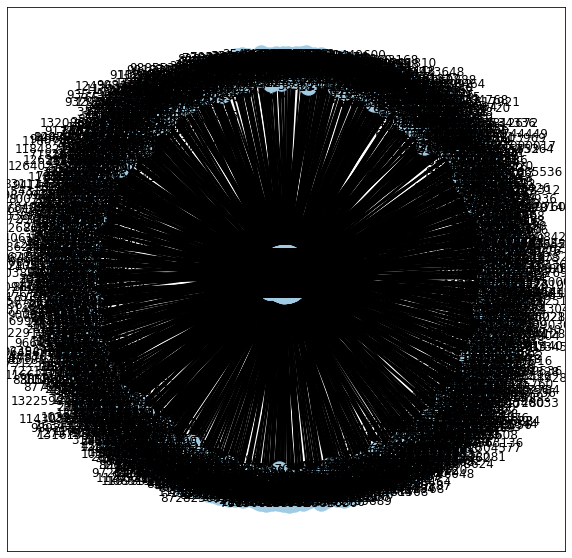

In [96]:
import matplotlib.pyplot as plt
from pylab import rcParams
graph = nx.read_gpickle("data/complete_graph.pkl")
rcParams['figure.figsize'] = 10, 10
nx.draw_networkx(
    graph,
    pos = nx.spring_layout(graph),
    node_color = '#A0CBE2',
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.savefig("data/graph.pdf")
plt.show()
plt.close()

## 6.
Producete una visualizzazione interattiva del grafo usando pyvis

In [135]:
from pyvis.network import Network
graph = nx.read_gpickle("data/complete_graph.pkl")
print(f"#nodes: {graph.number_of_nodes()}")
print(f"#edges: {graph.number_of_edges()}")

#nodes: 3124
#edges: 4161


In [136]:
graph

In [137]:
ntGraph = Network(
    height="100%", 
    width="100%", 
    bgcolor="#222222", 
    font_color="white",
    heading="Graph"
)
ntGraph.barnes_hut()
ntGraph.from_nx(graph)
neighbor_map = ntGraph.get_adj_list()
#for node in ntGraph.nodes:
 #   node["value"] = len(neighbor_map[node["id"]])
ntGraph.show("data/comeplete_graph.html")

## 7.
Verificate se il grafo:
- è connesso (is_connected)
- è bipartito (is_bipartite)

In [118]:
def isConnected(graph):
    if nx.is_connected(graph) == True:
        print("Il grafo è connesso")
    else:
        print("Il grafo NON è connesso")

def isWeaklyConnected(graph):
    connected_components = nx.number_weakly_connected_components(graph)
    if nx.is_weakly_connected(graph) == True:
        print(f"Il grafo è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")

def isStronglyConnected(graph):
    connected_components = nx.number_strongly_connected_components(graph)
    if nx.is_strongly_connected(graph) == True:
        print(f"Il grafo è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
        
def isBipartite(graph):
    if nx.is_bipartite(graph) == True:
        print("Il grafo è bipartito")
    else:
        print("Il grafo NON è bipartito")

In [119]:
graph = nx.read_gpickle("data/complete_graph.pkl")
isBipartite(graph)
isWeaklyConnected(graph)
isStronglyConnected(graph)

Il grafo NON è bipartito
Il grafo NON è debolmente connesso
Componenti debolmente connesse: 416
Il grafo NON è fortemente connesso
Componenti fortemente connesse: 2390


In [ ]:
# non funziona con i grafi orientati
isConnected(graph)

## 8.
Misurate le seguenti distanze sul grafo:
- Centro (center) : il grafo deve essere FORTEMENTE CONNESSO
- Diametro (diameter) : il grafo deve essere FORTEMENTE CONNESSO
- Raggio (radius) : il grafo deve essere FORTEMENTE CONNESSO

**FORTEMENTE CONNESSO:** For a Strongly Connected Graph, each vertex must have an in-degree and an out-degree of at least 1. Therefore, in order to make a graph strongly connected, each vertex must have an incoming edge and an outgoing edge.

Rimozione nodi isolati

In [122]:
def removeIsolates(graph):
    graph_no_isolates = graph
    graph_no_isolates.remove_nodes_from(list(nx.isolates(graph_no_isolates)))
    #nx.write_gpickle(graph_no_isolates, "data/graph_no_isolates.pkl")
    return graph_no_isolates

In [123]:
graph = nx.read_gpickle("data/complete_graph.pkl")
graph_no_isolates = removeIsolates(graph)
nx.write_gpickle(graph_no_isolates, "data/graph_no_isolates.pkl")
print(f"#nodes: {graph_no_isolates.number_of_nodes()}")
print(f"#edges: {graph_no_isolates.number_of_edges()}")

#nodes: 2709
#edges: 4161


In [138]:
def createStronglyConnectedGraph(graph):
    strong_graph = nx.DiGraph()
    strong_components = nx.strongly_connected_components(graph)
    print(list(strong_components))

In [139]:
createStronglyConnectedGraph(graph)

[{15089078}, {1663172653}, {794790254}, {3085799703}, {755397390}, {3091376321}, {33284619}, {24603962}, {419395379}, {412155441}, {72474729}, {25268217}, {27131901}, {228130177}, {404376053}, {15962096}, {561642136}, {399935607}, {456853606}, {196476038}, {414978578}, {1048018930785083392}, {122127763}, {546315483}, {110509537}, {58324434}, {117652722}, {9507112}, {42909798}, {20887537}, {65184105}, {341258707}, {1023096199}, {192931240}, {474233138}, {388212968}, {142837256}, {1095972841}, {461578921}, {29716049}, {175529610}, {483172916}, {50956443}, {73909361}, {38190507}, {579842788}, {216744325}, {182486010}, {78577226}, {1193486898}, {452570555}, {533315563}, {224466293}, {406869976}, {271310204}, {115180931}, {506166021}, {16362818}, {17922590}, {623111545}, {540259669}, {248916795}, {31422403}, {188233241}, {456673160}, {354847710}, {36094947}, {577430083}, {1725341478}, {115512512}, {705427898749079552}, {66815732}, {204387286}, {128213903}, {59414975}, {253046215}, {38533936

In [ ]:
nx.center(x)

## 9.
Calcolate le seguenti misure di centralità sul grafo:
- Betweenness centrality (betweenness_centrality)
- Closeness centrality (closeness_centrality)
- Degree centrality (degree_centrality)
- In-degree centrality (in_degree_centrality)
- Out-degree centrality (out_degree_centrality)
- Page Rank (pagerank)
- HITS (hits)

## 10.
Generate il sottografo indotto dal nodo damiano10 (ego_graph) e calcolate:
- Cricca massima (max_clique)
- Dimensione della cricca massima (large_clique_size)

## 11.
Calcolate la copertura minima degli archi (min_edge_cover) del grafo

## 12.
Calcolate i seguenti coefficienti per stimare la “small-world-ness” del grafo:
- Coefficiente omega (omega)
- Coefficiente sigma (sigma)

## 13.
Calcolare la correlazione di Pearson Rho e di Kendall Tau fra le misure di centralità;
riportare il risultato in due tabelle